In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import cmath
from numba import njit, f8,i8,c16
import numba
import matplotlib.animation as animation
import copy
import matplotlib
import random
import concurrent
import func_for_paralell

import sys
sys.path.append('../../lb')
import RungeKutta_acceralated

#パラメーター
nu = 0.001
f = (1 + 1j) * 5 * 0.001
Dimention = 14 #uの次元数
q = 2
k_0 = 2 ** (-4)
k_n = np.zeros((Dimention+4,1))
k_n[2:-2,0] = [k_0 * q ** (i+1) for i in range(Dimention)]
#print(k_n)

c_n_1 = copy.deepcopy(k_n)[2:-2, 0:]
c_n_1[-2:, 0:] = np.zeros((2,1))
#print(c_n_1)

beta = 0.5
c_n_2 = copy.deepcopy(k_n)[1:-3, 0:] * -beta
c_n_2[-1, 0] = np.zeros((1, 1))
# print(c_n_2)

c_n_3 = copy.deepcopy(k_n)[:-4, 0:] * (beta - 1)
#print(c_n_3)

#parameter = [nu,f,k_n,c_n_1,c_n_2,c_n_3]
parameter = {
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}
#print(parameter)
# print(k_n)

runge_para = {
    'start' :  np.load("14次元初期値.npy"),
    'step' : 0.01,
    'period' : np.array([0,200000]),
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}



In [6]:
model.get_sum(**runge_para)

In [23]:
model.get_arr_latter(**runge_para)

# compute orbite with caliculating energy spectrum

19999999
[[1.48474800e+07]
 [3.38799613e+06]
 [5.75200557e+06]
 [3.65485406e+06]
 [2.60575830e+06]
 [2.15737307e+06]
 [2.04292693e+06]
 [1.05972034e+06]
 [1.00979420e+06]
 [9.09574459e+05]
 [3.91462416e+05]
 [8.37183756e+04]
 [5.24884306e+03]
 [6.16357921e+01]]


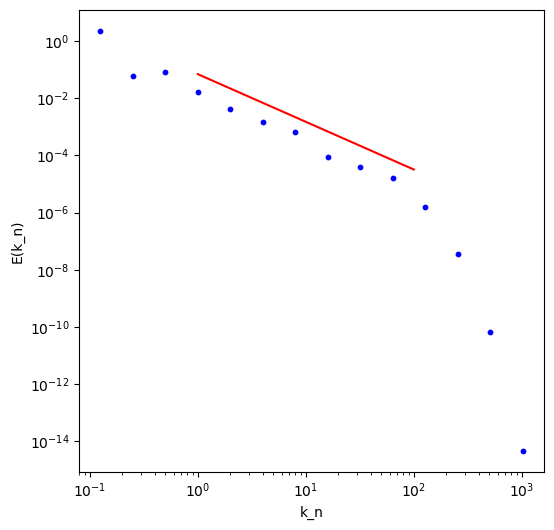

CPU times: user 43.8 s, sys: 213 ms, total: 44 s
Wall time: 44.6 s


In [28]:
%%time
# パラメータの確認必須!ﾖｼｯ
runge_para['start'] = np.load("../laminar_initials/beta0.423_nu0.00017584784643038092_step0.01_2000.0period_laminar.npy")
#nu
runge_para["nu"] = 0.00017584784643038092
#betaの値に従いc_n_2,c_n_3を更新
beta = 0.423
latter = 1

#c_n_2
runge_para["c_n_2"] = runge_para["k_n"][1:-3, 0:] * -beta
runge_para["c_n_2"][-1, 0:] = np.zeros((1, 1))

#c_n_3
runge_para["c_n_3"] = runge_para["k_n"][:-4, 0:] * (beta - 1)

#縦軸エネルギースペクトル、横軸k_nをプロット(両軸logスケール)
#メモリ超節約ver

model = RungeKutta_acceralated.RungeKutta()
model.get_sum(**runge_para)

# #後半の10分の1で算出される

energy = model.average ** 2 / (2 * k_n[2:-2])#.ravelは多次元を1次元にするやつ

plt.figure(figsize=(6, 6))
plt.xscale("log")
plt.yscale("log")
#plt.xlim(1.0E-2,1.0E7)
#plt.ylim(0,1E-17)
#plt.xticks(np.arange(1E-02,1E+07,10))
plt.xlabel("k_n")
plt.ylabel("E(k_n)")
plt.scatter(k_n[2:-2],energy,c="blue",s=10)

support_x = np.linspace(1,1e+2,10)
support_y = (np.linspace(1,1e+2,10) * 5 )** (-5/3) 

plt.plot(support_x ,support_y,label="-5/3",c="red")
plt.savefig(f"../energy spectrum image/energy_beta{beta}_nu{runge_para['nu']}_{runge_para['step']}_time{runge_para['period']}_{Dimention}dim_latter{round(1/latter, 3)}.png")
plt.show()

# Input orbit and compute energy spectrum

In [3]:
array = np.load("/Users/hibiki/Downloads/beta0.423_nu0.00017584784643038092_step0.01_1500check_500pro_200000period.npz")["laminar"]

In [21]:
beta=0.423
runge_para['nu'] = 0.00017584784643038092
runge_para['step'] = 0.01
runge_para['period'] = 200000
Dimention = array.shape[1] - 1

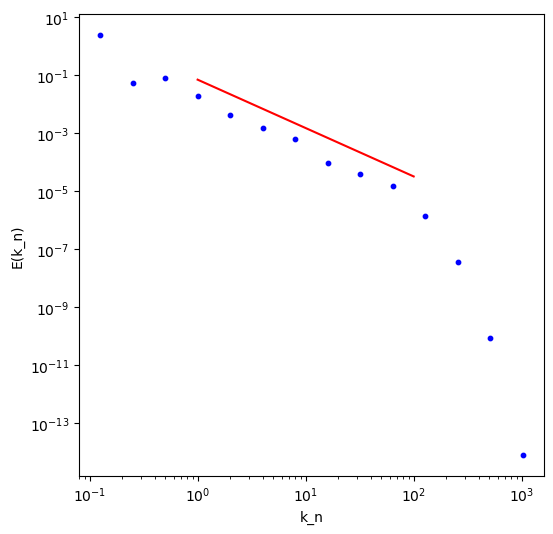

In [23]:
average = np.sum(np.abs(array[:-1,:]), axis=1)/array.shape[1]
energy = average ** 2 / (2 * runge_para['k_n'][2:-2,0])

plt.figure(figsize=(6, 6))
plt.xscale("log")
plt.yscale("log")
#plt.xlim(1.0E-2,1.0E7)
#plt.ylim(0,1E-17)
#plt.xticks(np.arange(1E-02,1E+07,10))
plt.xlabel("k_n")
plt.ylabel("E(k_n)")
plt.scatter(runge_para['k_n'][2:-2,0],energy,c="blue",s=10)

support_x = np.linspace(1,1e+2,10)
support_y = (np.linspace(1,1e+2,10) * 5 )** (-5/3) 

plt.plot(support_x ,support_y,label="-5/3",c="red")
plt.savefig(f"../energy spectrum image/energy_beta{beta}_nu{runge_para['nu']}_{runge_para['step']}_time{runge_para['period']}_{Dimention}dim.png")
plt.show()